In [ ]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import scipy.stats as stats
import plotly.express as px

mpl.rc('font', family = 'Malgun Gothic')  # Windows

In [ ]:
# !pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import imblearn

In [ ]:
df1 = pd.read_csv('01_Data.csv', encoding = 'utf-8')
df1

,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,Address2,State,Overdue_count,Overdue_Type,Gender,Credit_Rank,Bank
0,1,66758234,렌탈,일반계약,영업방판,2019-05-06,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,9.0,새마을금고
1,2,66755948,렌탈,교체계약,영업방판,2020-02-20,60,카드이체,DES-1,102900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,2.0,현대카드
2,3,66756657,렌탈,일반계약,홈쇼핑/방송,2019-02-28,60,CMS,DES-1,96900,개인,48.0,경기도,경기도,계약확정,0,없음,여자,8.0,우리은행
3,4,66423450,멤버십,멤버십3유형,재계약,2019-05-13,12,CMS,DES-1,66900,개인,39.0,경기도,경기도,계약확정,0,없음,남자,5.0,농협회원조합
4,5,66423204,멤버십,멤버십3유형,재계약,2019-05-10,12,CMS,DES-1,66900,개인,60.0,경기도,경기도,기간만료,12,있음,남자,8.0,농협회원조합
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51296,51298,66579515,렌탈,프로모션계약,대형마트A,2019-03-01,60,CMS,DES-3A,96900,개인,47.0,경기도,경기도,계약확정,0,없음,남자,NaN,기업은행
51297,51299,66799558,렌탈,일반계약,대형마트A,2019-04-01,60,CMS,DES-1,96900,개인,42.0,경기도,경기도,계약확정,0,없음,여자,8.0,새마을금고
51298,51300,66799197,렌탈,프로모션계약,영업방판,2019-04-01,39,카드이체,ERA,120900,개인,65.0,서울특별시,서울특별시,계약확정,0,없음,여자,1.0,롯데카드
51299,51301,66792778,렌탈,일반계약,홈쇼핑/방송,2020-02-06,60,카드이체,DES-1,96900,개인,54.0,서울특별시,서울특별시,계약확정,0,없음,여자,2.0,롯데카드


In [ ]:
# 01.
df1['Total_Amount'] = df1['Amount_Month'] * df1['Term']
df1['Total_Amount'].describe()

count    5.130100e+04
mean     5.315394e+06
std      1.455794e+06
min      6.624000e+05
25%      4.914000e+06
50%      5.814000e+06
75%      5.814000e+06
max      1.006200e+07
Name: Total_Amount, dtype: float64

In [ ]:
# 02.
cond1 = (df1['Total_Amount'] >= df1['Total_Amount'].quantile(0.9))
cond2 = (df1['Total_Amount'] >= df1['Total_Amount'].quantile(0.7))

df1['Member_Rank'] = 'Normal'
df1.loc[cond2, 'Member_Rank'] = 'Special'
df1.loc[cond1, 'Member_Rank'] = 'VIP'
df1['Member_Rank'].value_counts()

Special    21145
Normal     20909
VIP         9247
Name: Member_Rank, dtype: int64

In [ ]:
# 03.
cond1 = (df1['Member_Rank'] == 'VIP')
p1 = df1.loc[cond1].pivot_table(index = 'Channel', values = 'Total_Amount', aggfunc = ['mean', 'sum']).reset_index()
p1

,Channel,mean,sum
,,Total_Amount,Total_Amount
0,대형마트A,6.657713e+06,6637739400
1,대형마트C,6.534000e+06,52272000
2,대형마트E,6.697143e+06,3100777200
3,대형마트H,6.498000e+06,506844000
4,영업방판,6.731221e+06,43739475300
5,자체홈페이지,6.452250e+06,154854000
6,재계약,6.354000e+06,6354000
7,전단홍보,6.794096e+06,1698524100
8,전문매장H,6.638545e+06,2144250000


In [ ]:
# 멀티인덱스인것을 확인
print(p1.columns)
print(p1.columns.droplevel(1))  # 0번째에 위치하는 인덱스를 제외하고, 1번째에 위치하는 인덱스를 지워준다는 뜻

MultiIndex([('Channel',             ''),
            (   'mean', 'Total_Amount'),
            (    'sum', 'Total_Amount')],
           )
Index(['Channel', 'mean', 'sum'], dtype='object')


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45824 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54805 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47560 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53944 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50689 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50629 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48169 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

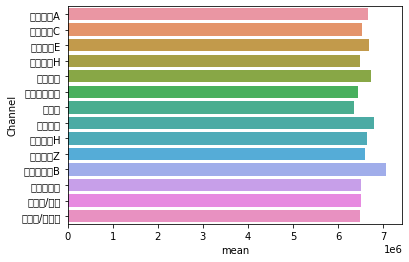

In [ ]:
# p1.columns = p1.columns.droplevel(1)
sns.barplot(data=p1, y='Channel', x='mean')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45824 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54805 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47560 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53944 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50689 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50629 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48169 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

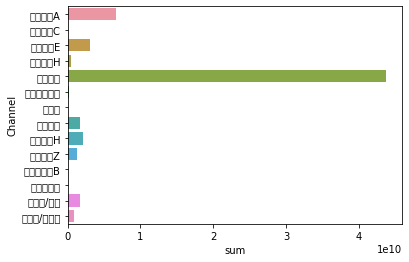

In [ ]:
sns.barplot(data=p1, y='Channel', x='sum')

In [ ]:
p1.melt(id_vars='Channel')

,Channel,variable,value
0,대형마트A,mean,6.657713e+06
1,대형마트C,mean,6.534000e+06
2,대형마트E,mean,6.697143e+06
3,대형마트H,mean,6.498000e+06
4,영업방판,mean,6.731221e+06
5,자체홈페이지,mean,6.452250e+06
6,재계약,mean,6.354000e+06
7,전단홍보,mean,6.794096e+06
8,전문매장H,mean,6.638545e+06
9,전문매장Z,mean,6.602187e+06


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45824 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54805 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47560 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53944 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50689 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50629 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48169 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

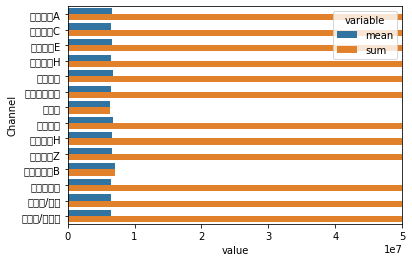

In [ ]:
import matplotlib.pyplot as plt
plt.xlim([0, 50000000])
sns.barplot(data = p1.melt(id_vars = 'Channel'), y = 'Channel', x = 'value', hue = 'variable')

In [ ]:
p1

,Channel,mean,sum
0,대형마트A,6.657713e+06,6637739400
1,대형마트C,6.534000e+06,52272000
2,대형마트E,6.697143e+06,3100777200
3,대형마트H,6.498000e+06,506844000
4,영업방판,6.731221e+06,43739475300
5,자체홈페이지,6.452250e+06,154854000
6,재계약,6.354000e+06,6354000
7,전단홍보,6.794096e+06,1698524100
8,전문매장H,6.638545e+06,2144250000
9,전문매장Z,6.602187e+06,1340244000


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45824 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54805 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47560 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53944 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50689 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50629 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48169 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

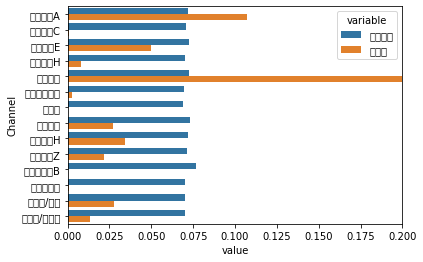

In [ ]:
p1['평균비율'] = p1['mean'] / p1['mean'].sum()
p1['합비율'] = p1['sum'] / p1['sum'].sum()
p1_ratio = p1[['Channel', '평균비율', '합비율']].melt(id_vars = 'Channel')

plt.xlim([0, 0.2])
sns.barplot(data=p1_ratio, y = 'Channel', x = 'value', hue = 'variable')

In [ ]:
# 04.
top3_list = p1.sort_values(by = 'sum', ascending = False)['Channel'].head(3).values

cond1 = df1['Channel'].isin(top3_list)
df1_top = df1.loc[cond1]
print(df1_top)

# 04-1.
stats.normaltest(df1_top['Total_Amount'])
print(stats.normaltest(df1_top['Total_Amount']))

# 04-2.
cond2 = (df1_top['Channel'] == top3_list[0])
cond3 = (df1_top['Channel'] == top3_list[1])
cond4 = (df1_top['Channel'] == top3_list[2])

df1_top1 = df1_top.loc[cond2]
df1_top2 = df1_top.loc[cond3]
df1_top3 = df1_top.loc[cond4]

stats.kruskal(df1_top1['Total_Amount'], df1_top2['Total_Amount'], df1_top3['Total_Amount'])
print(stats.kruskal(df1_top1['Total_Amount'], df1_top2['Total_Amount'], df1_top3['Total_Amount']))

       Index  Member_ID Sales_Type Contract_Type Channel    Datetime  Term  \
0          1   66758234         렌탈          일반계약    영업방판  2019-05-06    60   
1          2   66755948         렌탈          교체계약    영업방판  2020-02-20    60   
5          6   66165241         렌탈        프로모션계약    영업방판  2019-07-29    60   
8          9   66758007         렌탈          일반계약    영업방판  2019-06-30    60   
9         10   66756702         렌탈        프로모션계약    영업방판  2019-06-30    60   
...      ...        ...        ...           ...     ...         ...   ...   
51293  51295   66799369         렌탈          일반계약   대형마트A  2020-07-10    60   
51294  51296   66796007         렌탈        프로모션계약   대형마트A  2019-03-11    60   
51296  51298   66579515         렌탈        프로모션계약   대형마트A  2019-03-01    60   
51297  51299   66799558         렌탈          일반계약   대형마트A  2019-04-01    60   
51298  51300   66799197         렌탈        프로모션계약    영업방판  2019-04-01    39   

      Payment_Type Product_Type  Amount_Month  ... Address1  Ad

(17400.408970458084,
 0.0,
 10,
 array([[15949.62860373,  3666.54381006,   848.16336914,   133.27699265,
           262.47823629,    48.90898813],
        [16129.65215103,  3707.92811056,   857.73659383,   134.78129081,
           265.44082961,    49.46102415],
        [ 7053.71924524,  1621.52807937,   375.10003704,    58.94171654,
           116.08093409,    21.62998772]]))

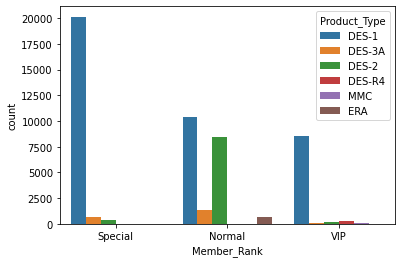

In [ ]:
# 05.
# 5-1. 고객의 등급과 제품군의 빈도수를 나타내는 그래프 시각화
sns.countplot(data=df1, x='Member_Rank', hue='Product_Type')

# 5-2. 고객의 등급과 제품군 간의 연관성이 있는지 가설검정 수행
# 귀무: 고객의 등급과 제품군 간의 연관성이 없다. (독립)
# 대립: 고객의 등급과 제품군 간의 연관성이 있다. (연관)
df1_table = pd.crosstab(df1['Member_Rank'], df1['Product_Type'])
stats.chi2_contingency(df1_table)
# pvalue < 0.05 / 대립가설 참 / 고객의 등급과 제품군 간의 연관성이 있다.

In [ ]:
# 06.
df1['Datetime_dt'] = pd.to_datetime(df1['Datetime'])
df1['Year'] = df1['Datetime_dt'].dt.year
df1['Month'] = df1['Datetime_dt'].dt.month

cond1 = (df1['Member_Rank'] == 'Special')
df1_special = df1.loc[cond1]

df1_special['Count'] = 1
df1_special.pivot_table(index='Month', values = 'Count', columns = 'Year', aggfunc='sum').reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Year,Month,2019,2020
0,1,1779.0,785.0
1,2,2740.0,835.0
2,3,2014.0,704.0
3,4,1496.0,553.0
4,5,1212.0,383.0
5,6,1118.0,359.0
6,7,1429.0,563.0
7,8,969.0,105.0
8,9,958.0,NaN
9,10,1335.0,NaN


In [ ]:
# 07.
p1 = df1.pivot_table(index='Product_Type', values = 'Total_Amount',
                columns = 'Year', aggfunc = 'sum')

p1['전년대비증감율'] = (p1[2020] - p1[2019]) / p1[2019]
p1

Year,2019,2020,전년대비증감율
Product_Type,,,
DES-1,167173962120,42612206976,-0.745103
DES-2,35856775800,8887944960,-0.752126
DES-3A,9361251360,2384535600,-0.745276
DES-R4,2007975600,506232000,-0.747889
ERA,2454835500,552672900,-0.774864
MMC,684063900,202562100,-0.703884


In [ ]:
# 08.
# 학습데이터와 검증데이터 분할
from sklearn.model_selection import train_test_split 

# 특성공학과 학습이 수행될 파이프라인 구성
from imblearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# 특성공학
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 학습알고리즘
from sklearn.tree import DecisionTreeRegressor

# 교차검증
from sklearn.model_selection import GridSearchCV

# 평가
from sklearn.metrics import r2_score

# 훈련시킬 데이터 선택하기
X = df1[['Age', 'Amount_Month', 'Term', 'Gender', 'Product_Type']]
Y = df1['Credit_Rank'].fillna(df1['Credit_Rank'].median())  # 결측치처리 중앙값으로

# 데이터 분할하기
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state = 1234)

# 파이프라인 만들어주기
numeric_pipe = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())
category_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder())
numeric_list = X.describe().columns.tolist()
category_list = X.describe(include = 'object').columns.tolist()

preprocessing_pipe = make_column_transformer((numeric_pipe, numeric_list),
                                             (category_pipe, category_list))

model_pipe = make_pipeline(preprocessing_pipe, DecisionTreeRegressor())
model_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Amount_Month',
                                                   'Term']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                               

In [ ]:
grid_model = GridSearchCV(model_pipe, cv = 3, param_grid = {}, n_jobs = -1)
grid_model.fit(X_train, Y_train)
best_model = grid_model.best_estimator_

In [ ]:
Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

r2_score(Y_train, Y_train_pred)

0.12535693861358532

In [ ]:
r2_score(Y_test, Y_test_pred)

-0.055743030878348865

In [ ]:
from sklearn.metrics import mean_squared_error

def evaluation_reg_func1(model):
  Y_train_pred = model.predict(X_train)
  Y_test_pred = model.predict(X_test)
  print('학습 성능 (R2)', r2_score(Y_train, Y_train_pred))
  print('일반화 성능 (R2)', r2_score(Y_test, Y_test_pred))
  print('학습성능 (MSE)', mean_squared_error(Y_train, Y_train_pred))
  print('일반화 성능 (MSE)', mean_squared_error(Y_test, Y_test_pred))

evaluation_reg_func1(best_model)

학습 성능 (R2) 0.12535693861358532
일반화 성능 (R2) -0.055743030878348865
학습성능 (MSE) 3.5997204068390385
일반화 성능 (MSE) 4.222952793563887


In [ ]:
# 09.
df1['Count'] = 1
p1 = df1.pivot_table(index='Product_Type', values = ['Total_Amount', 'Count'], aggfunc = 'sum').reset_index()

p1['Mean'] = p1['Total_Amount'] / p1['Count']
p1

,Product_Type,Count,Total_Amount,Mean
0,DES-1,39133,209786169096,5.360851e+06
1,DES-2,8996,44744720760,4.973846e+06
2,DES-3A,2081,11745786960,5.644299e+06
3,DES-R4,327,2514207600,7.688708e+06
4,ERA,644,3007508400,4.670044e+06
5,MMC,120,886626000,7.388550e+06
